In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pandas Data Cleaning and Analysis

In [3]:
print("Air Quality and Air Pollution Analysis")
print("------------------------")
print('Summary:\nAnalyze air quality data over time and across locations to understand pollution trends, \nmajor pollutants, and seasonal variations.')

Air Quality and Air Pollution Analysis
------------------------
Summary:
Analyze air quality data over time and across locations to understand pollution trends, 
major pollutants, and seasonal variations.


In [99]:
df=pd.read_csv(r'D:\DataSets\city_day.csv')
df.head(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN


In [100]:
print(f"Information Of This Dataset:\n")
df.info()

Information Of This Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [101]:
print(f"\nMissing Values In This Dataset:\n")
for i in df.isnull().sum():
    print(i)


Missing Values In This Dataset:

0
0
4598
11140
3582
3585
4185
10328
2059
3854
4022
5623
8041
18109
4681
4681


In [102]:
columns=[]
for i in df.columns:
    columns.append(i)
print(f"Columns In This Dataset:{len(columns)} Columns\n",columns)

Columns In This Dataset:16 Columns
 ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [103]:
cities=[]
for i in df['City'].unique():
    cities.append(i)
print(f'Name of cities:\n{cities}')

Name of cities:
['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']


In [104]:
values=[]
for i in df['AQI_Bucket'].unique():
    values.append(i)
print(f'Name of cities:\n{values}')

Name of cities:
[nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good']


In [105]:
# Show the percentage of missing values in each column
missing_percentage=df.isnull().mean()*100
print(f"Pecentage of Missing Values:\n{missing_percentage.sort_values(ascending=False)}")

Pecentage of Missing Values:
Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
Date           0.000000
City           0.000000
dtype: float64


In [106]:
# Removed Duplicates 
df=df.drop_duplicates()
print("After Removing Duplicates, the shape is:",df.shape)

After Removing Duplicates, the shape is: (29531, 16)


In [107]:
# Drop rows with missing 'City' or 'Date'
df=df.dropna(subset=['City','Date'])

In [108]:
# Convert 'Date' to datetime and extract year, month, day.
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day


In [113]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
year              0
month             0
Day               0
dtype: int64

In [114]:
# Filling missing values with median of each column.
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','AQI']
for col in pollutants:
    df[col]=df.groupby('City')[col].transform(lambda x:x.fillna(x.median()))

In [116]:
column=[i for i in df.describe().columns]
df[column]=df[column].fillna(df[column].median())

In [119]:
# Fill missing 'AQI_Bucket' with 'NA'

df['AQI_Bucket']=df['AQI_Bucket'].fillna('NA')

# col=df['AQI']
# for i in col:
#     if i<=50:
#         df['AQI_Bucket']=df['AQI_Bucket'].fillna('Good')
#     elif i<=100:
#         df['AQI_Bucket']=df['AQI_Bucket'].fillna('Satisfactory')
#     elif i<=200:
#         df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')
#     elif i<=300:
#         df['AQI_Bucket']=df['AQI_Bucket'].fillna('Poor')
#     elif i<=400:
#         df['AQI_Bucket']=df['AQI_Bucket'].fillna('Very Poor')
#     else:
#         df['AQI_Bucket']=df['AQI_Bucket'].fillna('Severe') 
        

In [148]:
start=df['Date'].min()
end=df['Date'].max()

print(f"Date Range Start from {start.date()} to {end.date()}")

Date Range Start from 2015-01-01 to 2020-07-01


## Exploratory Analysis


Distribution Of various pollutions

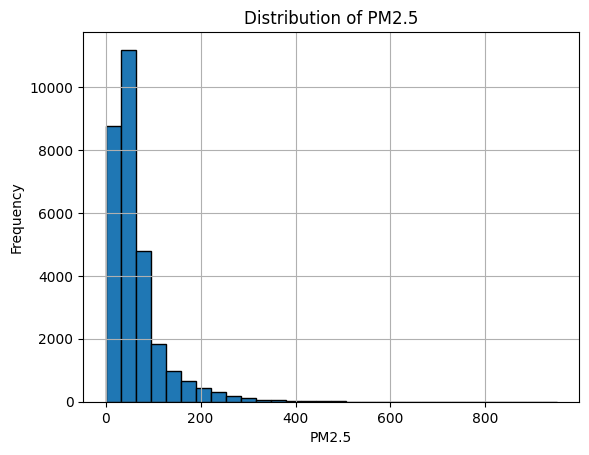

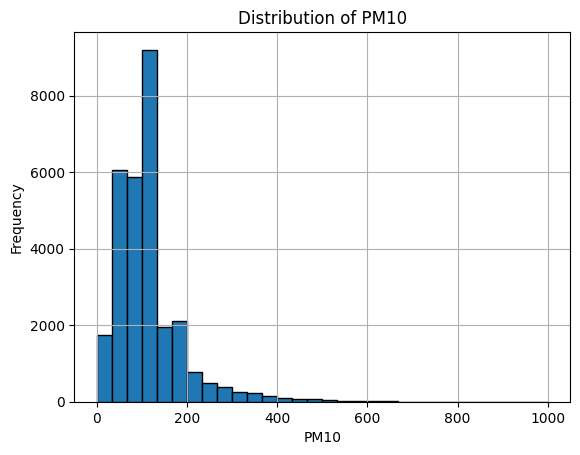

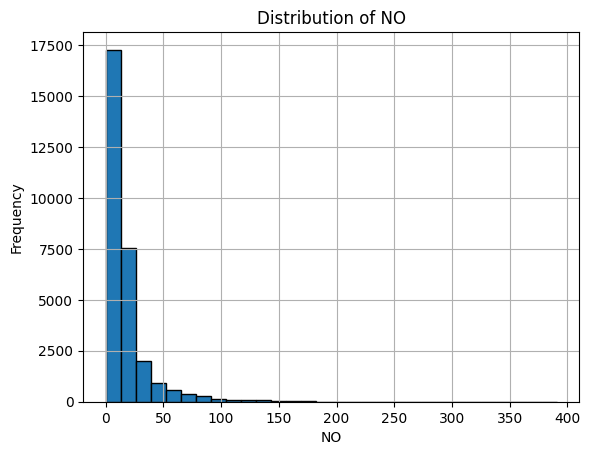

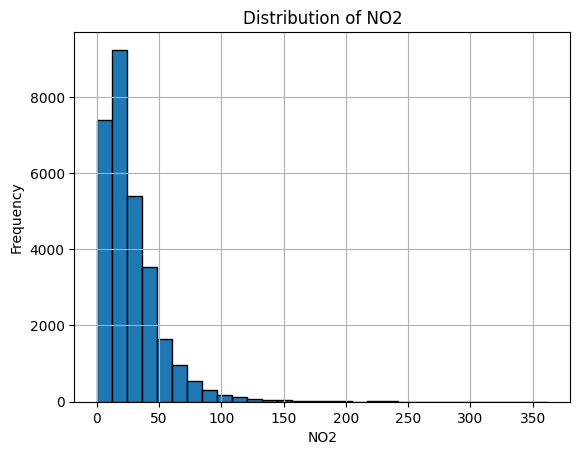

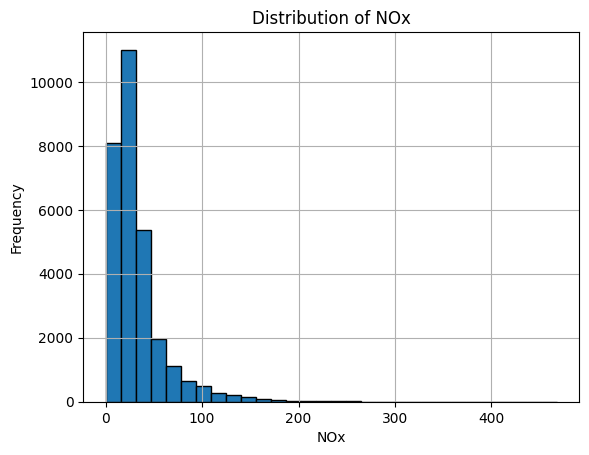

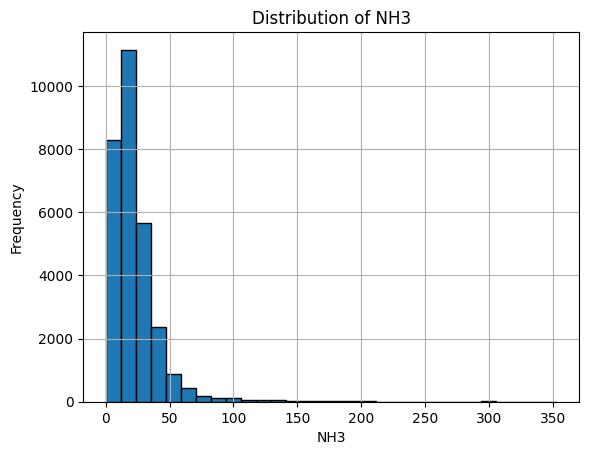

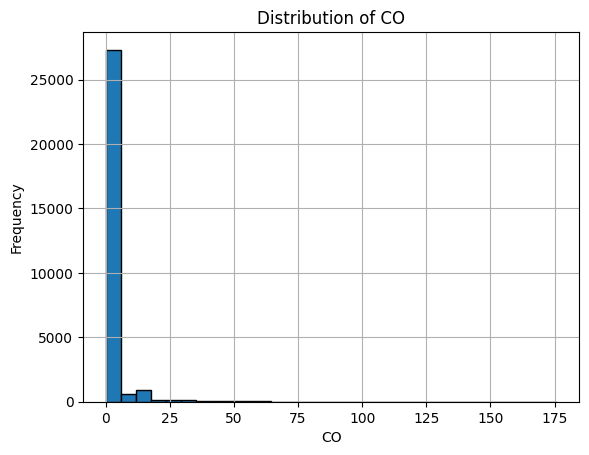

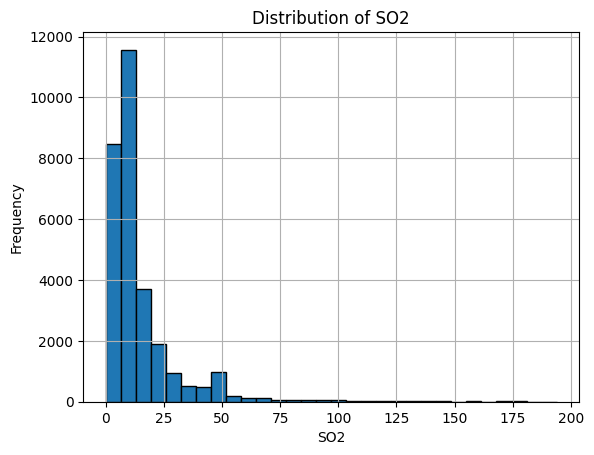

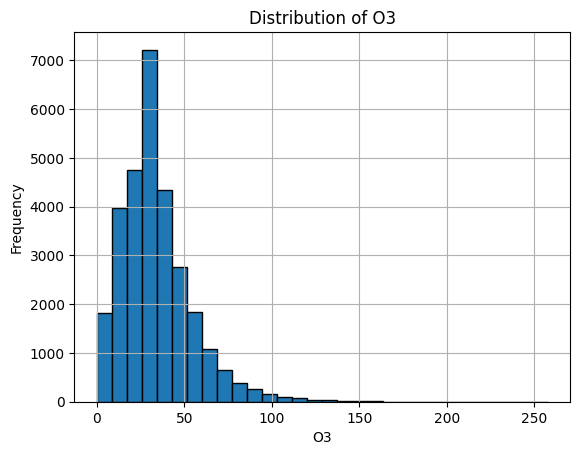

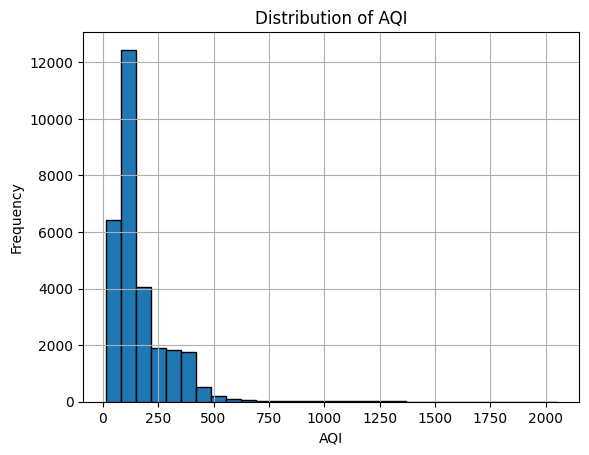

In [162]:
for i in pollutants:
    plt.hist(df[i],bins=30,edgecolor='black')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

Average Pollution levels By city.

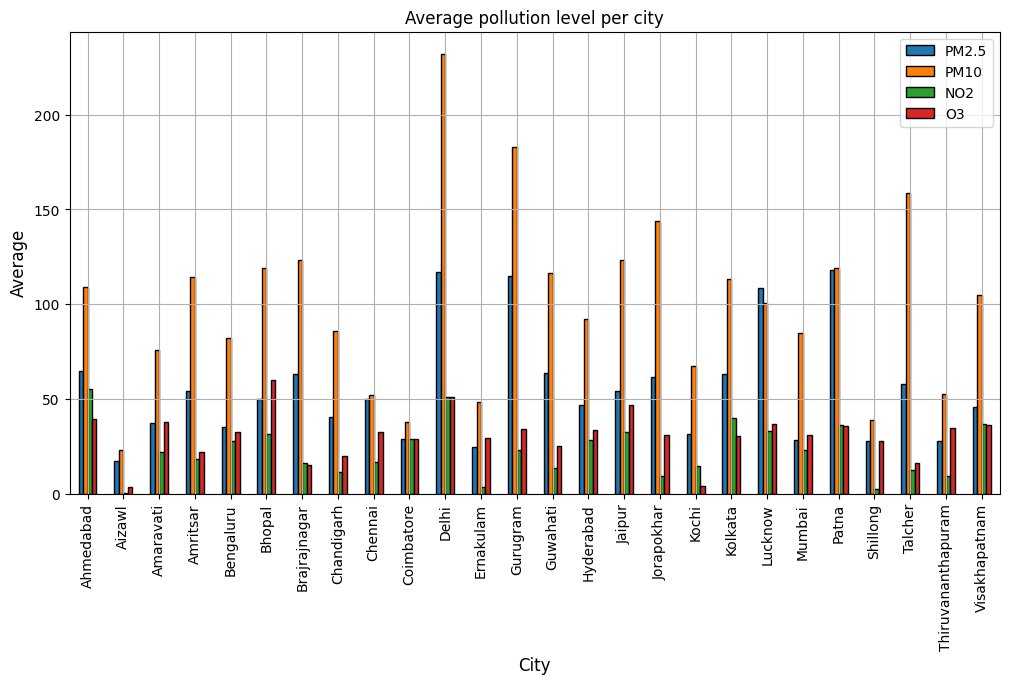

In [188]:
df.groupby("City")[['PM2.5','PM10','NO2','O3']].mean().plot(kind='bar',figsize=(12,6),edgecolor='black')
plt.title('Average pollution level per city')
plt.xlabel('City',fontsize=12)
plt.ylabel('Average',fontsize=12)
plt.grid()
plt.show()

Average PM2.5 level per month of every year.

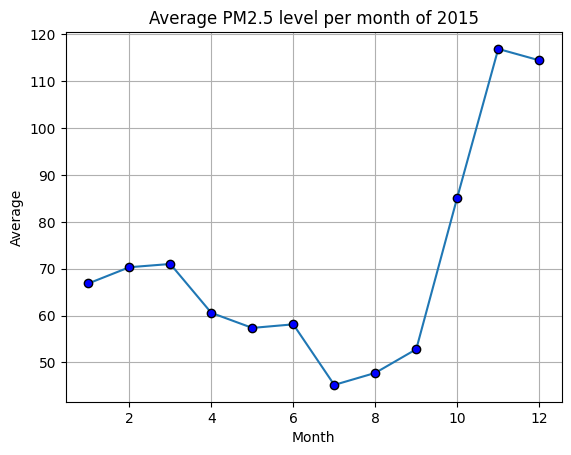

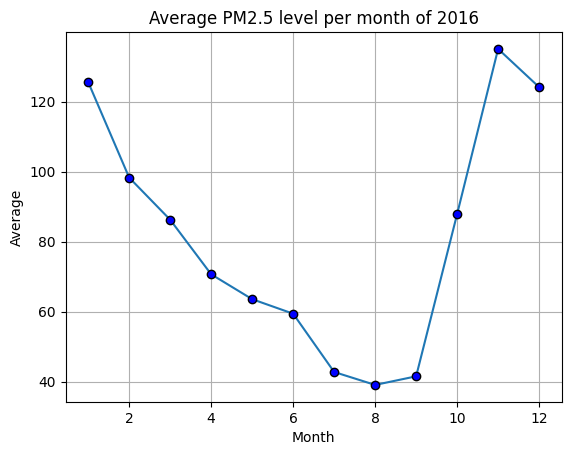

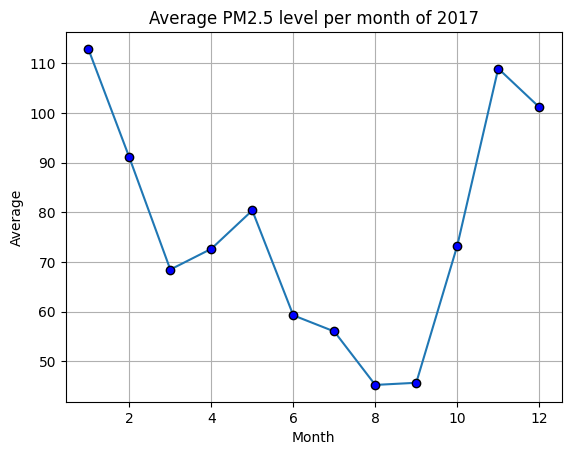

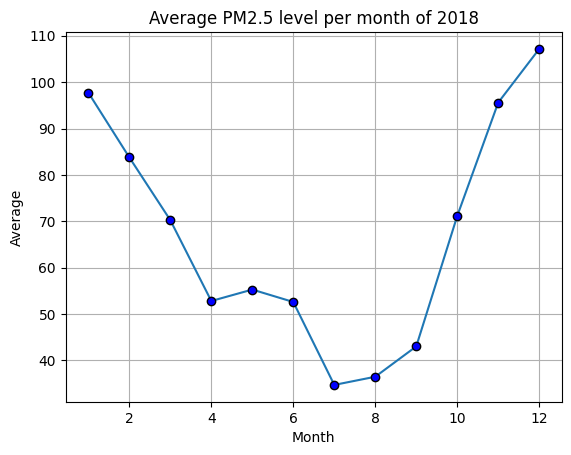

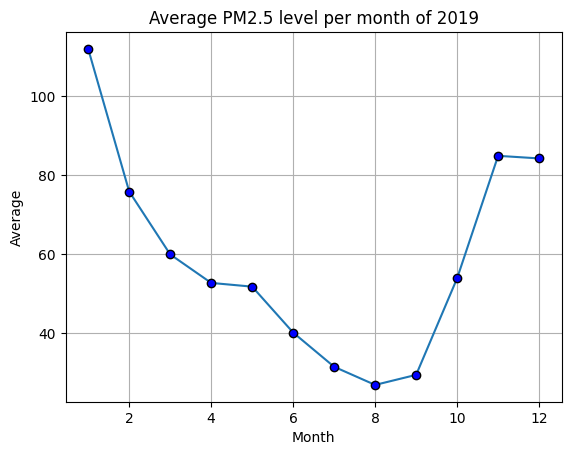

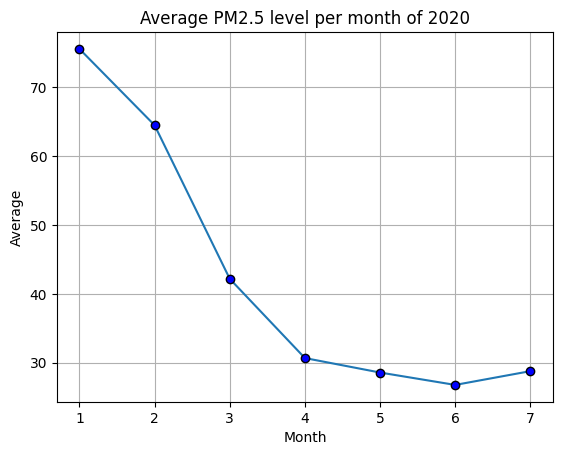

In [189]:
years=[]
for i in df['year'].unique():
    years.append(i)
    
group=df.groupby(['year','month'])['PM2.5'].mean()
for i in years:
    a=group[i]
    a.plot(kind='line',marker='o',markerfacecolor='blue',markeredgecolor='black')
    plt.title(f'Average PM2.5 level per month of {i}')
    plt.xlabel('Month')
    plt.ylabel('Average')
    plt.grid()
    plt.show()

In [1]:
df

NameError: name 'df' is not defined